In [46]:
import torch
torch.cuda.is_available()

True

In [47]:
import os
import time
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim


In [48]:
extraction_path = './lung_colon_image_set'
print("Contents of the extraction path:")
print(os.listdir(extraction_path))
print("*********")
train_path = os.path.join(extraction_path, 'train')
print("Contents of the 'train' directory:")
print(os.listdir(train_path))
print("*********")
val_path = os.path.join(extraction_path, 'val')
print("Contents of the 'val' directory:")
print(os.listdir(val_path))

Contents of the extraction path:
['colon_image_sets', 'lung_image_sets', 'train', 'val']
*********
Contents of the 'train' directory:
['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
*********
Contents of the 'val' directory:
['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


In [49]:
for cls in os.listdir(train_path):
    cls_train_path = os.path.join(train_path, cls)
    print(f"Class {cls} in 'train': {len(os.listdir(cls_train_path))} images")
for cls in os.listdir(val_path):
    cls_val_path = os.path.join(val_path, cls)
    print(f"Class {cls} in 'val': {len(os.listdir(cls_val_path))} images")

Class colon_aca in 'train': 4000 images
Class colon_n in 'train': 4000 images
Class lung_aca in 'train': 4000 images
Class lung_n in 'train': 4000 images
Class lung_scc in 'train': 4000 images
Class colon_aca in 'val': 1000 images
Class colon_n in 'val': 1000 images
Class lung_aca in 'val': 1000 images
Class lung_n in 'val': 1000 images
Class lung_scc in 'val': 1000 images


In [50]:
colon_path = os.path.join(extraction_path, 'colon_image_sets')
lung_path = os.path.join(extraction_path, 'lung_image_sets')
print("Contents of the 'colon_image_sets' directory:")
print(os.listdir(colon_path))
print("Contents of the 'lung_image_sets' directory:")
print(os.listdir(lung_path))


Contents of the 'colon_image_sets' directory:
['colon_aca', 'colon_n']
Contents of the 'lung_image_sets' directory:
['lung_aca', 'lung_n', 'lung_scc']


In [51]:
classes = ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
train_dir = os.path.join(extraction_path, 'train')
val_dir = os.path.join(extraction_path, 'val')
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

print("Class-specific folders created in 'train' and 'val' directories.")


Class-specific folders created in 'train' and 'val' directories.


In [ ]:
def split_and_move_images(src_dir, class_name):
    images = os.listdir(src_dir)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_images:
        shutil.move(os.path.join(src_dir, img), os.path.join(train_dir, class_name, img))
    for img in val_images:
        shutil.move(os.path.join(src_dir, img), os.path.join(val_dir, class_name, img))

split_and_move_images(os.path.join(colon_path, 'colon_aca'), 'colon_aca')
split_and_move_images(os.path.join(colon_path, 'colon_n'), 'colon_n')
split_and_move_images(os.path.join(lung_path, 'lung_aca'), 'lung_aca')
split_and_move_images(os.path.join(lung_path, 'lung_n'), 'lung_n')
split_and_move_images(os.path.join(lung_path, 'lung_scc'), 'lung_scc')

print("Images successfully split and moved to 'train' and 'val' directories.")


In [53]:
for cls in classes:
    cls_train_path = os.path.join(train_dir, cls)
    print(f"Class {cls} in 'train': {len(os.listdir(cls_train_path))} images")

for cls in classes:
    cls_val_path = os.path.join(val_dir, cls)
    print(f"Class {cls} in 'val': {len(os.listdir(cls_val_path))} images")


Class colon_aca in 'train': 4000 images
Class colon_n in 'train': 4000 images
Class lung_aca in 'train': 4000 images
Class lung_n in 'train': 4000 images
Class lung_scc in 'train': 4000 images
Class colon_aca in 'val': 1000 images
Class colon_n in 'val': 1000 images
Class lung_aca in 'val': 1000 images
Class lung_n in 'val': 1000 images
Class lung_scc in 'val': 1000 images


In [54]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 pixels
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet's mean and std
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")


Number of training batches: 625
Number of validation batches: 157


In [65]:
sample_dir = os.path.join(train_dir, 'colon_aca')
print("Sample image files in 'colon_aca':")
print(os.listdir(sample_dir)[:10]) 


Sample image files in 'colon_aca':
['colonca1.jpeg', 'colonca10.jpeg', 'colonca100.jpeg', 'colonca1000.jpeg', 'colonca1001.jpeg', 'colonca1002.jpeg', 'colonca1003.jpeg', 'colonca1004.jpeg', 'colonca1006.jpeg', 'colonca1007.jpeg']


In [66]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet stats
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [57]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transforms)


In [58]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [60]:
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
        
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=15)


Epoch 1/15, Loss: 0.1721
Epoch 2/15, Loss: 0.0707
Epoch 3/15, Loss: 0.0507
Epoch 4/15, Loss: 0.0433
Epoch 5/15, Loss: 0.0570
Epoch 6/15, Loss: 0.0231
Epoch 7/15, Loss: 0.0357
Epoch 8/15, Loss: 0.0357
Epoch 9/15, Loss: 0.0147
Epoch 10/15, Loss: 0.0225
Epoch 11/15, Loss: 0.0210
Epoch 12/15, Loss: 0.0126
Epoch 13/15, Loss: 0.0113
Epoch 14/15, Loss: 0.0228
Epoch 15/15, Loss: 0.0201


In [61]:
def evaluate_model(model, dataloader, criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() * images.size(0)
    
    avg_loss = running_loss / len(dataloader.dataset)
    accuracy = 100 * correct / total
    print(f'Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

evaluate_model(model, val_loader, criterion)


Validation Loss: 0.0175, Accuracy: 99.46%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.64].


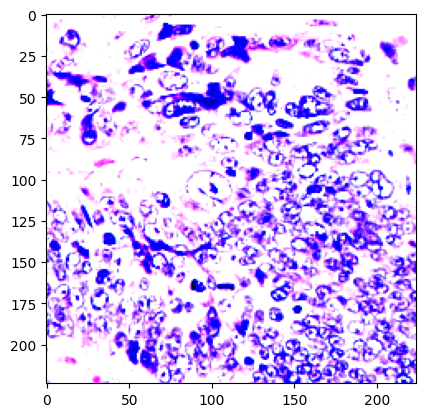

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


Predicted: colon_aca, Actual: colon_aca


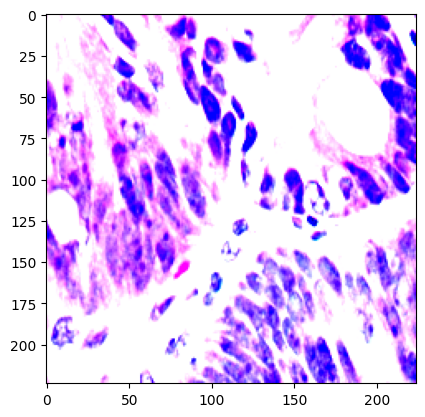

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.64].


Predicted: colon_aca, Actual: colon_aca


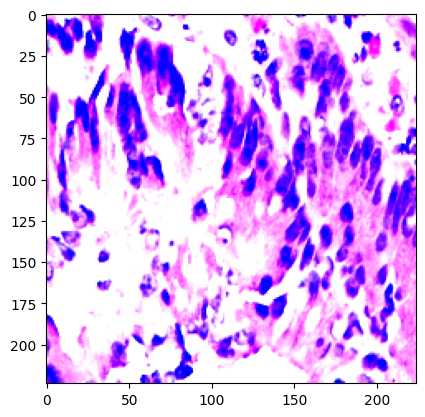

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..2.64].


Predicted: colon_aca, Actual: colon_aca


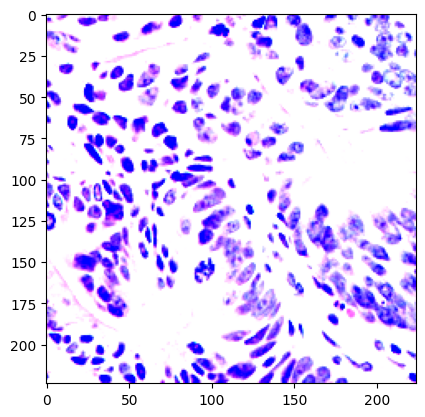

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9831933..2.64].


Predicted: colon_aca, Actual: colon_aca


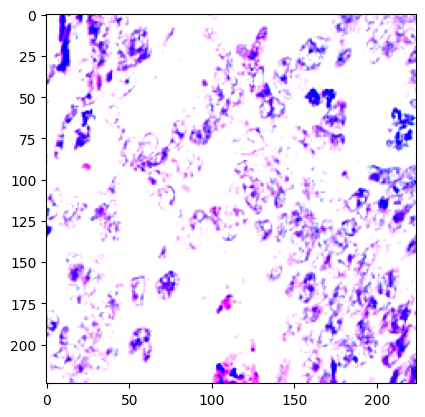

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Predicted: colon_aca, Actual: colon_aca


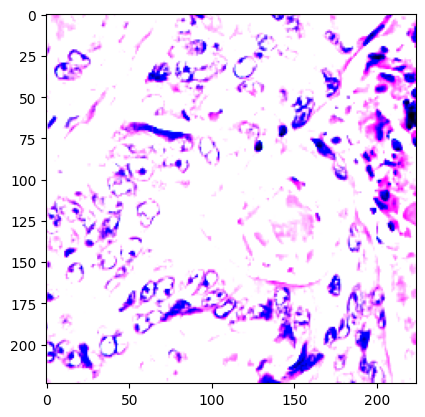

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.64].


Predicted: colon_aca, Actual: colon_aca


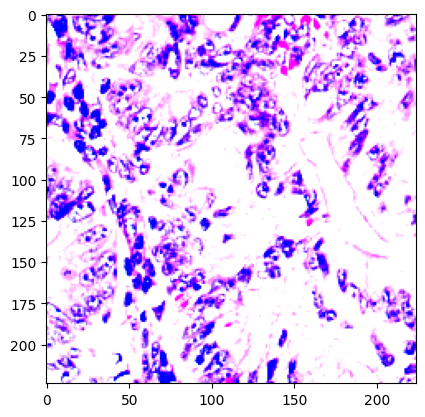

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Predicted: colon_aca, Actual: colon_aca


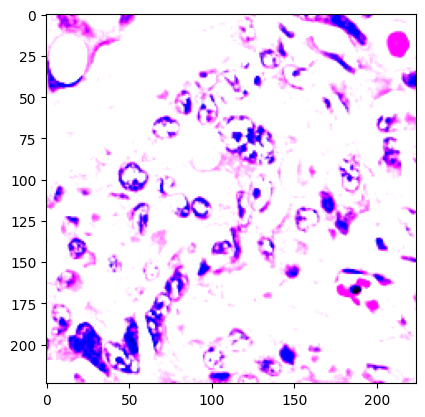

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.64].


Predicted: colon_aca, Actual: colon_aca


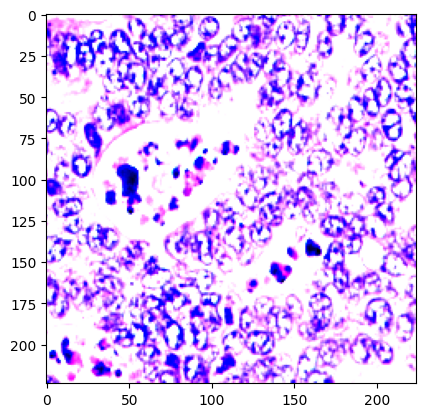

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].


Predicted: colon_aca, Actual: colon_aca


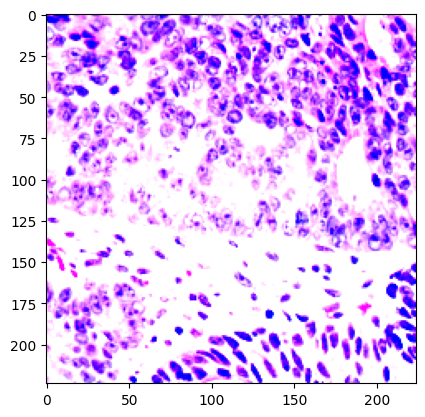

Predicted: colon_aca, Actual: colon_aca


In [68]:
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.show()

dataiter = iter(val_loader)
images, labels = next(dataiter)
indices = torch.randperm(images.size(0))
images = images[indices]
labels = labels[indices]

outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

for i in range(10):
    imshow(images[i])
    print(f"Predicted: {val_dataset.classes[preds[i]]}, Actual: {val_dataset.classes[labels[i]]}")

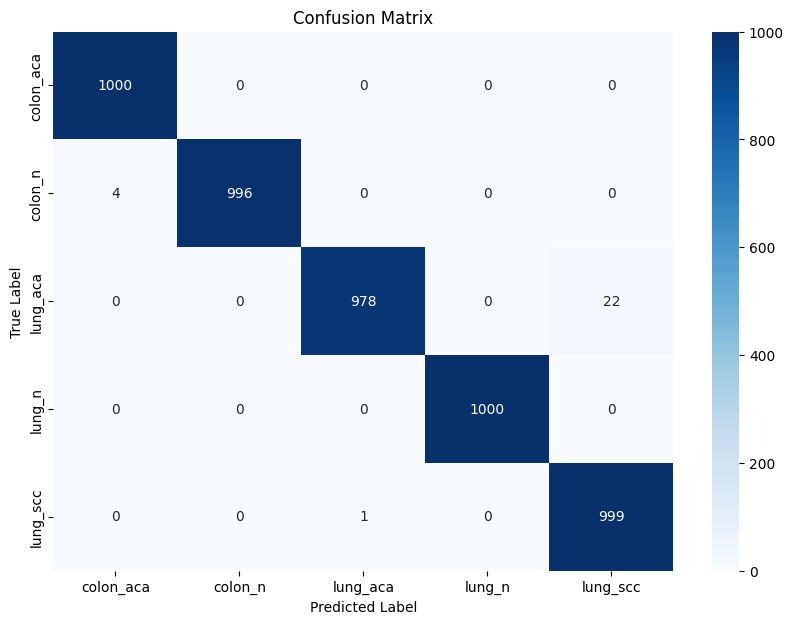

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images.to(device))
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plot_confusion_matrix(cm, classes=train_dataset.classes)


In [64]:
torch.save(model, 'model.pth')

